Initial state vector |00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
State vector after X gate: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


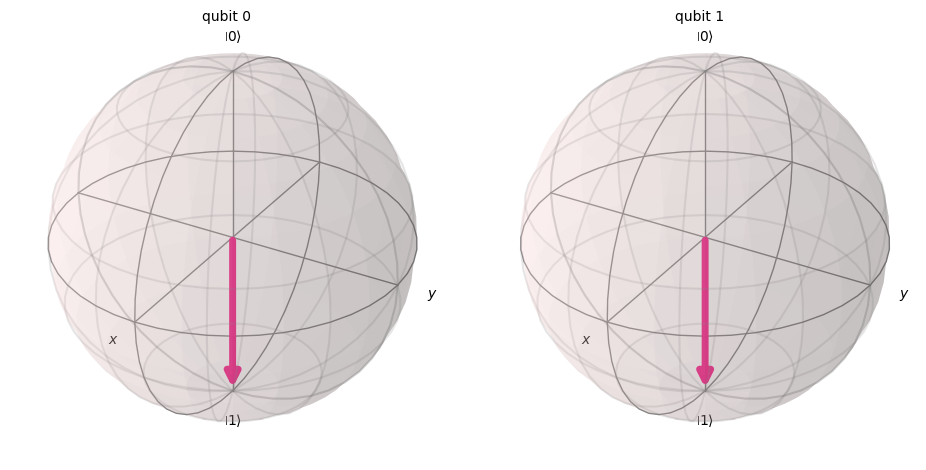

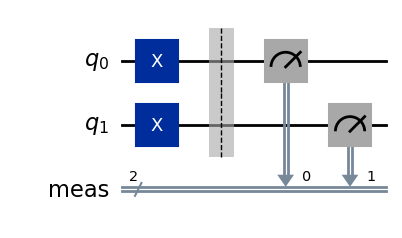

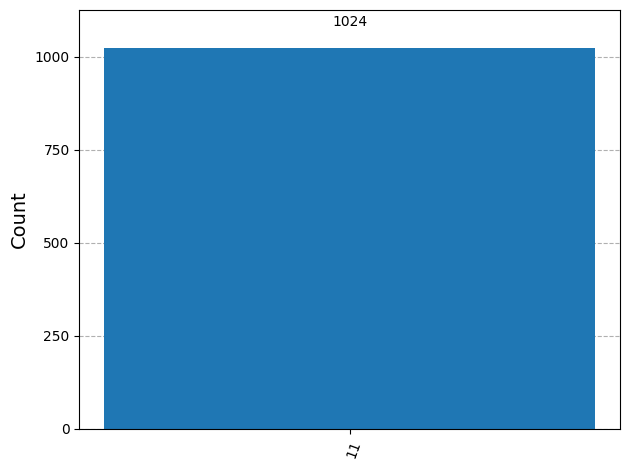

In [ ]:
# Quantum Simulation: Two Qubits Pass Through X Gate in Parallel

# Step 1: Import required libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from IPython.display import display

# Step 2: Initialize a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Step 3: Apply X gate (NOT gate) to both qubits
qc.x(0)
qc.x(1)

# Step 4: Draw the quantum circuit (gate logic circuit)
qc.draw('mpl')

# Step 5: Get the initial state vector |00>
init_state = Statevector.from_label('00')
print("Initial state vector |00>:", init_state.data)

# Step 6: Apply the quantum circuit to the initial state vector
final_state = init_state.evolve(qc)
print("State vector after X gate:", final_state.data)

# Step 7: Visualize Bloch sphere and measurement results
display(plot_bloch_multivector(final_state))

# Step 8: Simulate measurement (output probabilities)
qc.measure_all()
display(qc.draw('mpl'))
sim = Aer.get_backend('aer_simulator')
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=1024).result()
counts = result.get_counts()
display(plot_histogram(counts))